**Toronto Airbnb Dataset**

Questions?

1. What are the most common anementies listed in Toronto Airbnbs?
2. Which neighborhoods have the highest reviews score and highest listing price?
3. What are the most influencial features of the dataset to estimate the price of a listing?

**Installing and Importing Python Libraries**

In [139]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter
from pylab import *


import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# interactive map library
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster


In [140]:
df_list = pd.read_csv('listings_sep_09_2020.csv')

In [141]:
df_list.shape

(19343, 74)

**Data Sources, Pre-processing and Data Cleaning**

In [142]:
# check columns
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

We see a lot of columns in the dataset and most of them do not contribute to our objective. Therefore, they can be dropped straight up. So let's just keep the columns that are of interest. 

In [143]:
# Cleaning data - Drops columns that are likely irrelevant to this analysis
df_list.drop(['id', 'listing_url', 'last_scraped', 'scrape_id','picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'description', 'neighborhood_overview', 'host_about', 'host_acceptance_rate', 'license', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'minimum_nights', 'host_identity_verified', 'neighbourhood_group_cleansed', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'bathrooms','instant_bookable', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'neighbourhood', 'first_review','last_review','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','has_availability', 'availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review', 'calendar_updated','review_scores_accuracy','reviews_per_month'], axis=1, inplace=True)


In [144]:
df_list.head()

,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,availability_30,number_of_reviews,review_scores_rating
0,Beautiful home in amazing area!,Little Portugal,43.64617,-79.42451,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Shampoo"", ""TV"", ""Dryer"", ""Indoor fireplace"",...",$469.00,0,7,100.0
1,Downtown Harbourfront Private Room,Waterfront Communities-The Island,43.64105,-79.37628,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Shampoo"", ""TV"", ""Pool"", ""Gym"", ""Free parking...",$99.00,30,169,97.0
2,Seaton Village Parlour Bedroom,Annex,43.66724,-79.41598,Private room in house,Private room,1,1.5 baths,1.0,1.0,"[""Indoor fireplace"", ""Wifi""]",$66.00,0,0,NaN
3,Queen Bedroom close to downtown,Briar Hill-Belgravia,43.69602,-79.45468,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$70.00,0,217,95.0
4,World Class downtown @CN Tower Theatre MTCC ga...,Waterfront Communities-The Island,43.64530,-79.38940,Entire condominium,Entire home/apt,5,1 bath,1.0,2.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$135.00,23,40,95.0


In [145]:
df_list.dtypes

name                       object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [146]:
# displays the data types and the number of these data types in the dataset
df_list.dtypes.value_counts()

object     7
float64    5
int64      3
dtype: int64

In [147]:
# drops rows in column 'price' has missing values
df_list = df_list.dropna(subset=['price'], axis=0)

In [148]:
# displays columns with missing values
df_list.isnull().sum().sort_values(ascending=False)

review_scores_rating      4333
bedrooms                  1429
beds                       196
bathrooms_text              13
name                         1
number_of_reviews            0
availability_30              0
price                        0
amenities                    0
accommodates                 0
room_type                    0
property_type                0
longitude                    0
latitude                     0
neighbourhood_cleansed       0
dtype: int64

**What are the most common amenities in Toronto Airbnbs?**

In [149]:
# removes "" from amenities list
df_list.amenities = df_list.amenities.str.replace("[{}]", "").str.replace('"', "")
df_list['amenities'].head()

0    [Shampoo, TV, Dryer, Indoor fireplace, Fire ex...
1    [Shampoo, TV, Pool, Gym, Free parking on premi...
2                             [Indoor fireplace, Wifi]
3    [Carbon monoxide alarm, Private entrance, Kitc...
4    [Carbon monoxide alarm, Private entrance, Kitc...
Name: amenities, dtype: object

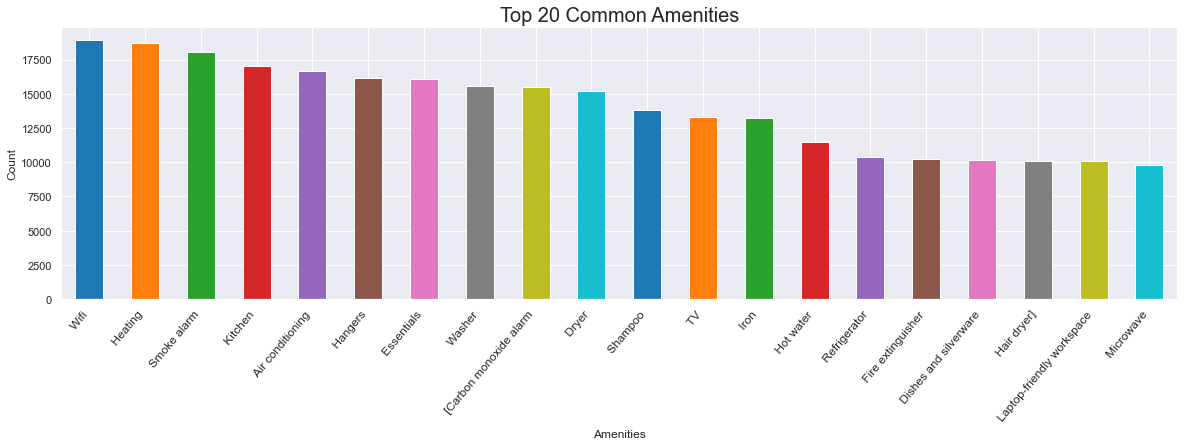

In [151]:
# display Top 20 common amenities
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
pd.Series(np.concatenate(df_list['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(figsize=(20,5), kind='bar', color=colors)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right', fontsize=12)
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.title('Top 20 Common Amenities', size=20)
plt.show();

In the above chart you can see that the most common amenities in Toronto listings are:

- Internet
- Heating
- Smoke Alarm
- Kitchen
- Air Conditioning

**Examining Neighborhood Frequency**

In [113]:
# analyze the top 20 frequency of each listing based on neighborhood
top_niegh = df_list['neighbourhood_cleansed'].value_counts().head(20)
top_niegh

Waterfront Communities-The Island      3291
Niagara                                 836
Annex                                   630
Church-Yonge Corridor                   628
Bay Street Corridor                     584
Kensington-Chinatown                    529
Dovercourt-Wallace Emerson-Junction     509
Moss Park                               484
Trinity-Bellwoods                       478
Willowdale East                         473
Little Portugal                         412
South Riverdale                         374
Palmerston-Little Italy                 352
South Parkdale                          314
Mount Pleasant West                     253
Mimico (includes Humber Bay Shores)     242
Cabbagetown-South St.James Town         233
Roncesvalles                            225
North St.James Town                     203
Newtonbrook West                        195
Name: neighbourhood_cleansed, dtype: int64

**Which Neighbourhood has the most Airbnb listings?**

[Text(0, 0, 'Waterfront Communities-The Island'),
 Text(1, 0, 'Niagara'),
 Text(2, 0, 'Annex'),
 Text(3, 0, 'Church-Yonge Corridor'),
 Text(4, 0, 'Bay Street Corridor'),
 Text(5, 0, 'Kensington-Chinatown'),
 Text(6, 0, 'Dovercourt-Wallace Emerson-Junction'),
 Text(7, 0, 'Moss Park'),
 Text(8, 0, 'Trinity-Bellwoods'),
 Text(9, 0, 'Willowdale East'),
 Text(10, 0, 'Little Portugal'),
 Text(11, 0, 'South Riverdale'),
 Text(12, 0, 'Palmerston-Little Italy'),
 Text(13, 0, 'South Parkdale'),
 Text(14, 0, 'Mount Pleasant West'),
 Text(15, 0, 'Mimico (includes Humber Bay Shores)'),
 Text(16, 0, 'Cabbagetown-South St.James Town'),
 Text(17, 0, 'Roncesvalles'),
 Text(18, 0, 'North St.James Town'),
 Text(19, 0, 'Newtonbrook West')]

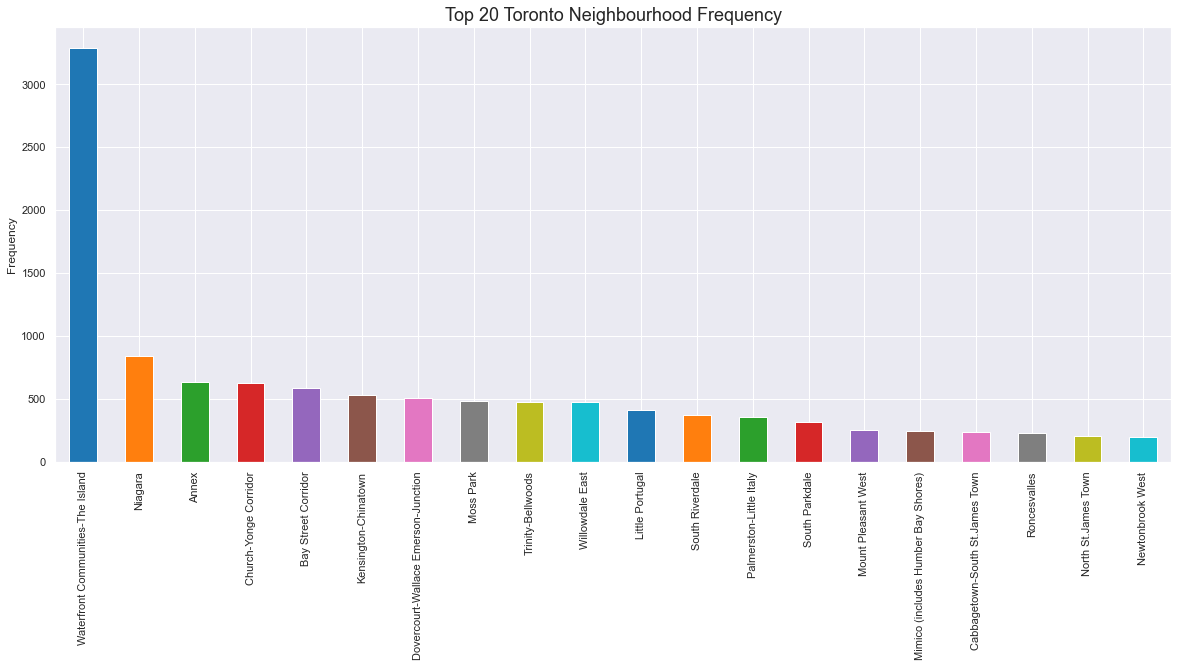

In [114]:
sns.set(rc={'figure.figsize':(20,8)})
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
bgraph = top_niegh.plot(kind='bar', color = colors)
bgraph.set_title('Top 20 Toronto Neighbourhood Frequency', size=18)
bgraph.set_ylabel('Frequency')
bgraph.set_xticklabels(bgraph.get_xticklabels(), rotation=90)

It looks like Waterfront Communities-The Island has the most listings, followed by Niagara, and then Annex. We will now analyze which neighborhoods have the highest rating review score and highest listing price.

**Which neighbourhoods have the highest rating review scores?**

In [115]:
# groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "review_scores_rating"
neigh_rating = df_list.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
neigh_rating

neighbourhood_cleansed
Forest Hill South           97.500000
Ionview                     97.038462
High Park-Swansea           97.021583
Humber Heights-Westmount    97.000000
Woodbine-Lumsden            96.926829
                              ...    
Westminster-Branson         89.444444
Agincourt North             89.391304
Maple Leaf                  89.214286
Rexdale-Kipling             84.952381
Black Creek                 81.700000
Name: review_scores_rating, Length: 140, dtype: float64

Text(0, 0.5, 'Rating')

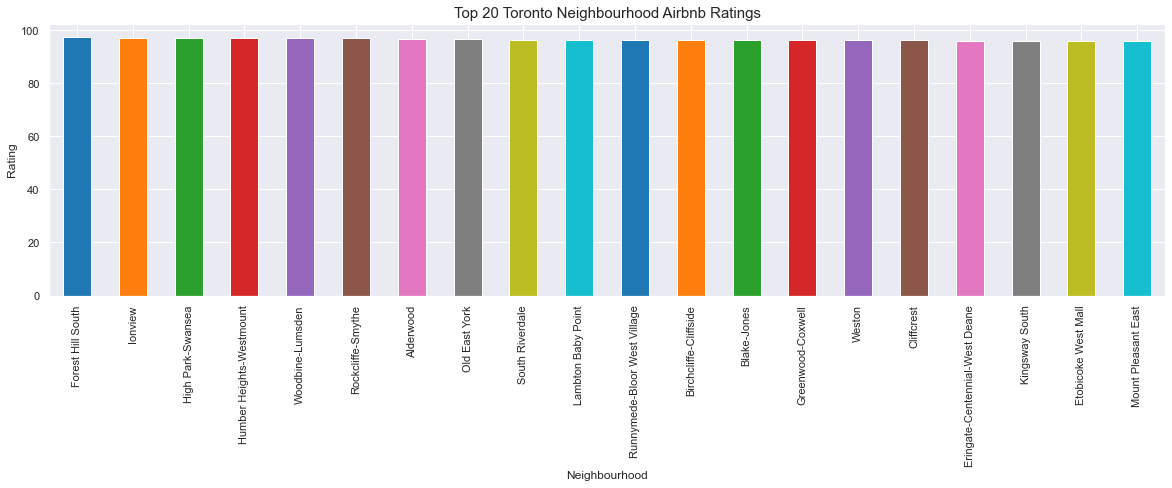

In [116]:
neigh_rating[:20].plot.bar(figsize=(20,5), color=colors)
plt.title('Top 20 Toronto Neighbourhood Airbnb Ratings', size=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Rating')


It looks like Forest Hill South, Ionview, and High Park-Swansea have the highest review score ratings. However, there isn't much variance/difference in the top 20 review score ratings

**Which neighbourhoods have the highest listing prices?**

In [117]:
# remove $ and , from price
df_list['price'] = df_list['price'].replace({'\$':''}, regex = True)
df_list['price'] = df_list['price'].replace({'\,':''}, regex = True)
# change 'price' from object to float type
df_list['price'] = df_list['price'].astype(float)

In [118]:
# removed listings of prices that were greater than $600 as they are most likely outliers
df_list.drop(df_list[df_list['price'] >= 600].index, inplace = True)

Text(0, 0.5, 'Price($)')

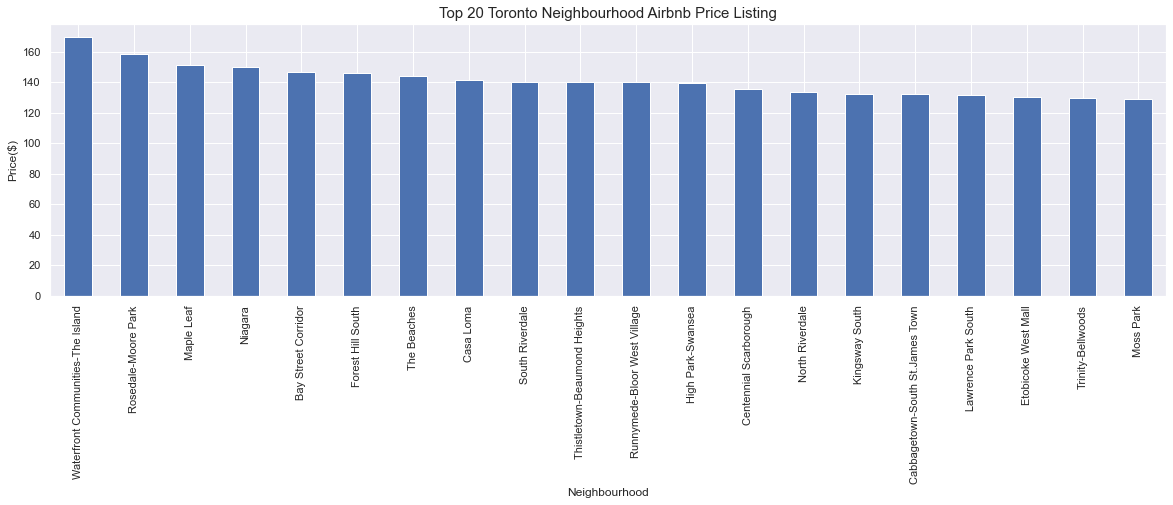

In [119]:
# # groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "price_listing"
neigh_price = df_list.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
neigh_price[:20].plot.bar(figsize=(20,5))
plt.title('Top 20 Toronto Neighbourhood Airbnb Price Listing', size=15)
plt.xlabel('Neighbourhood')
plt.ylabel('Price($)')

Woburn, Forest Hill South, and Kingsway South have the highest listing prices.

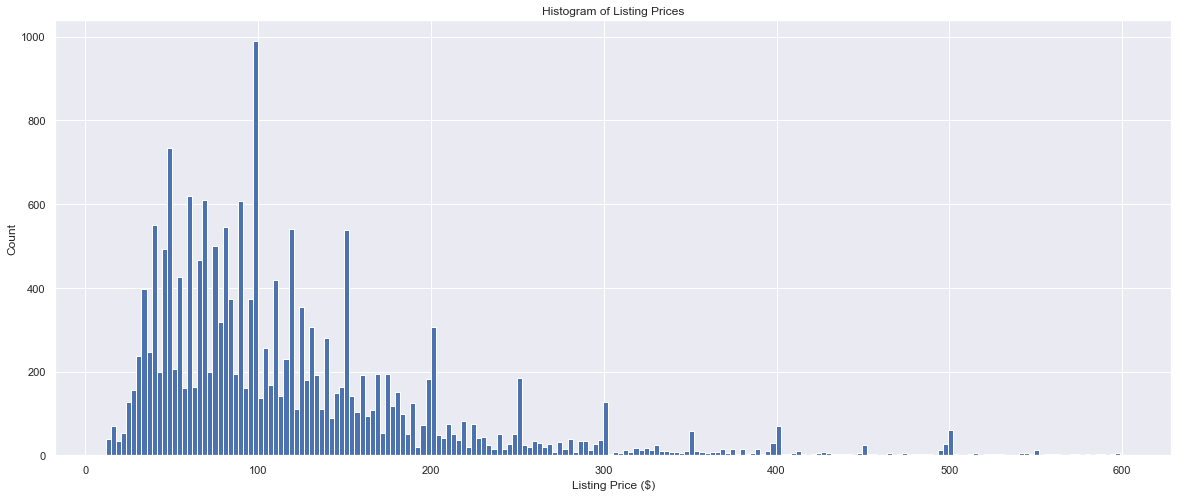

In [120]:
df_list.loc[(df_list.price <= 600) & (df_list.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing Price ($)')
plt.title('Histogram of Listing Prices');

**Toronto Airbnb Map Visualizations**

In [121]:
Tor_map = folium.Map([43.64617,-79.42451],zoom_start=11)
HeatMap(df_list[['latitude','longitude']],radius=10).add_to(Tor_map)
display(Tor_map)

In [122]:
cluster_map = folium.Map([43.64617,-79.42451],zoom_start=11)
FastMarkerCluster(df_list[['latitude','longitude']],radius=10).add_to(cluster_map)
cluster_map

**Predictive Analysis And Modeling**

Now that we converted all the varibles to numerical values, let's make our training and testing data sets.

In [123]:
df_list2 = df_list[['price',
           'room_type',
           'accommodates',
           'bedrooms',
           'beds',
           'review_scores_rating',
           'room_type',
           'amenities']]
df_list2.head()

,price,room_type,accommodates,bedrooms,beds,review_scores_rating,room_type,amenities
0,469.0,Entire home/apt,10,5.0,7.0,100.0,Entire home/apt,"[Shampoo, TV, Dryer, Indoor fireplace, Fire ex..."
1,99.0,Private room,2,1.0,1.0,97.0,Private room,"[Shampoo, TV, Pool, Gym, Free parking on premi..."
2,66.0,Private room,1,1.0,1.0,NaN,Private room,"[Indoor fireplace, Wifi]"
3,70.0,Private room,3,1.0,1.0,95.0,Private room,"[Carbon monoxide alarm, Private entrance, Kitc..."
4,135.0,Entire home/apt,5,1.0,2.0,95.0,Entire home/apt,"[Carbon monoxide alarm, Private entrance, Kitc..."


In [124]:
room_type = pd.get_dummies(df_list2.room_type).astype(int)

In [125]:
# we drop the original columns and replace them with indicator columns
df_list2 = df_list2.drop(['room_type'], axis = 1)

In [126]:
df_list2['review_scores_rating'].fillna((df_list2['review_scores_rating'].mean()), inplace=True)
df_list2['bedrooms'].fillna((df_list2['bedrooms'].mode()[0]), inplace=True)
df_list2['beds'].fillna((df_list2['beds'].mode()[0]), inplace=True)

In [127]:
# splitting the amenities list to draw out how many amenities each listing has

amenities_list = []

for element in df_list2.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

df_list2.amenities = amenities_list

In [128]:
df_list2

,price,accommodates,bedrooms,beds,review_scores_rating,amenities
0,469.0,10,5.0,7.0,100.000000,19
1,99.0,2,1.0,1.0,97.000000,17
2,66.0,1,1.0,1.0,94.291529,3
3,70.0,3,1.0,1.0,95.000000,60
4,135.0,5,1.0,2.0,95.000000,69
...,...,...,...,...,...,...
19338,99.0,2,1.0,1.0,94.291529,53
19339,37.0,1,1.0,1.0,94.291529,18
19340,29.0,1,1.0,1.0,94.291529,12
19341,111.0,2,1.0,2.0,94.291529,18


In [129]:
#Split into explanatory and response variables
X = df_list2[['accommodates', 'bedrooms', 'beds', 'review_scores_rating','amenities']]
y = df_list2['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.3258264850338315 on 5704 values.'

TESTING

**Term document matrix for amenities feature**

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

df_list.amenities = df_list.amenities.str.replace("[{}]", "").str.replace('"', "")
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(df_list['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())


The following are the **numeric** features we will be using.

In [131]:
listings_new = df_list[['accommodates','beds','availability_30','number_of_reviews','review_scores_rating', 'bedrooms','price']]

In [132]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

**Processing and adding categorical features**

In [133]:
for cat_feature in ['room_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(df_list[cat_feature])], axis=1)

Add Term document matrices that we created earlier from amenities feature.

In [134]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

In [135]:
listings_new.head()

,accommodates,beds,availability_30,number_of_reviews,review_scores_rating,bedrooms,price,Entire home/apt,Hotel room,Private room,...,[shampoo,[shower gel,[smart lock,[smoke alarm,[stove,[tv,[washer,[wifi,[wifi],[window guards
0,10,7.0,0,7,100.0,5.0,469.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,1.0,30,169,97.0,1.0,99.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,1.0,0,0,97.0,1.0,66.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,0,217,95.0,1.0,70.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,2.0,23,40,95.0,1.0,135.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Data pre-processing and feature engineering done!

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [137]:
y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.2f' % rmse_rf)
print('R^2 test: %.2f' % (r2_score(y_test, y_test_pred)))

RMSE test: 67.08
R^2 test: 0.41


In [138]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
5,bedrooms,0.256317
6,Entire home/apt,0.081018
0,accommodates,0.067890
3,number_of_reviews,0.057066
2,availability_30,0.051717
4,review_scores_rating,0.039017
1,beds,0.021448
8,Private room,0.009803
55,free parking on premises,0.009563
52,fire extinguisher,0.009389


In [44]:
#Split into explanatory and response variables
X = listings_new[['accommodates', 'bedrooms', 'beds', 'review_scores_rating']]
y = listings_new['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.33873495964293354 on 5607 values.'

In [45]:
from sklearn.cluster import KMeans

In [46]:
# Fuction for initializing a k-means cluster model (modeling process starts here)
def score(listings_new, k):
    kmeans_k = KMeans(k)
    model_k = kmeans_k.fit(listings_new)
    return abs(model_k.score(listings_new))

In [47]:
# Initliazes a line space with range from 1 to 20
scores = []
centers = np.linspace(1,20,20)
for i in range(1, 21):
    scores.append(score(listings_new, i))

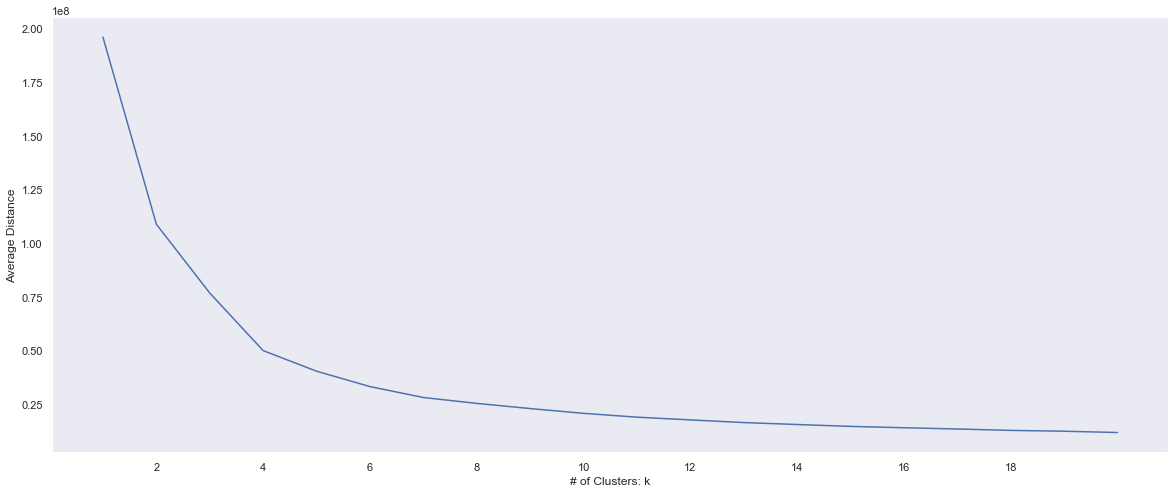

In [48]:
# Investigates the change within-cluster distance across number of clusters
fig, ax = plt.subplots()
ax.plot(centers, scores)
ax.set(ylabel='Average Distance', xlabel='# of Clusters: k')
ax.grid()
plt.xticks(np.arange(2,20,2))
plt.show()

In [49]:
# Re-fits the k-means model with the selected number of clusters
kmeans_k = KMeans(10)
model_k = kmeans_k.fit(listings_new)
listings_new_kmeans = model_k.predict(listings_new)
listings_new_kmeans

array([5, 7, 0, ..., 6, 2, 0])

In [50]:
# Creates a new column showing clusters in the dataset used in the model
listings_new['Clusters'] = pd.Series(listings_new_kmeans, index=listings_new.index)

In [51]:
listings_new.head(10)

,accommodates,beds,availability_30,number_of_reviews,review_scores_rating,bedrooms,price,Entire home/apt,Hotel room,Private room,...,[shower gel,[smart lock,[smoke alarm,[stove,[tv,[washer,[wifi,[wifi],[window guards,Clusters
0,10,7.0,0,7,100.0,5.0,469.0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,2,1.0,30,169,97.0,1.0,99.0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
2,1,1.0,0,0,97.0,1.0,66.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,0,217,95.0,1.0,70.0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
4,5,2.0,23,40,95.0,1.0,135.0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
5,1,1.0,0,26,98.0,1.0,54.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.0,23,7,97.0,1.0,53.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,2.0,30,1,100.0,1.0,132.0,1,0,0,...,0,0,0,0,1,0,0,0,0,2
8,5,2.0,10,110,93.0,2.0,100.0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
9,2,1.0,0,82,94.0,1.0,75.0,1,0,0,...,0,0,0,0,0,0,0,0,0,8


In [456]:
# Groups data by clusters and shows the means of numerical values by cluster
listings_new_cluster_groups = listings_new.groupby(['Clusters']).mean()
listings_new_cluster_groups.head(10)

,accommodates,beds,availability_30,number_of_reviews,review_scores_rating,bedrooms,price,Entire home/apt,Hotel room,Private room,...,[shampoo,[shower gel,[smart lock,[smoke alarm,[stove,[tv,[washer,[wifi,[wifi],[window guards
Clusters,,,,,,,,,,,,,,,,,,,,,
0,1.825955,1.129964,8.560707,9.256128,93.962569,1.052632,49.115599,0.178985,0.003420,0.766863,...,0.051302,0.000760,0.003420,0.00038,0.000760,0.016721,0.000190,0.000760,0.00019,0.00019
1,3.536866,1.816470,10.070859,12.208107,95.128631,1.506224,149.100412,0.894670,0.002553,0.100862,...,0.050431,0.000319,0.004469,0.00000,0.001277,0.020109,0.000319,0.000000,0.00000,0.00000
2,5.308579,2.754161,11.094750,15.938540,96.170294,2.338028,332.577286,0.905250,0.012804,0.076825,...,0.044814,0.000000,0.010243,0.00000,0.000000,0.028169,0.000000,0.000000,0.00000,0.00000
3,2.968067,1.499160,12.058824,189.080672,95.652101,1.178151,94.634151,0.721008,0.000000,0.275630,...,0.068908,0.000000,0.005042,0.00000,0.000000,0.011765,0.000000,0.000000,0.00000,0.00000
4,6.314754,3.170492,13.081967,22.960656,95.183607,2.619672,492.600295,0.898361,0.000000,0.095082,...,0.055738,0.003279,0.009836,0.00000,0.000000,0.019672,0.000000,0.000000,0.00000,0.00000
5,4.487847,2.204861,12.397569,108.001736,96.171875,1.675347,183.227917,0.980903,0.000000,0.019097,...,0.050347,0.001736,0.001736,0.00000,0.000000,0.022569,0.000000,0.000000,0.00000,0.00000
6,2.812085,1.455511,9.137450,79.332005,95.322045,1.168659,83.140963,0.659363,0.001992,0.331341,...,0.061753,0.000000,0.003984,0.00000,0.000664,0.017264,0.000000,0.000664,0.00000,0.00000
7,4.355664,2.223508,10.510353,10.967722,95.183922,1.910475,218.768453,0.930572,0.003654,0.062119,...,0.046285,0.000000,0.007917,0.00000,0.001827,0.016443,0.000000,0.000609,0.00000,0.00000
8,2.721038,1.438911,8.543786,9.238869,94.912640,1.222199,95.869318,0.718717,0.003798,0.270732,...,0.053176,0.000422,0.004642,0.00000,0.000633,0.021524,0.000211,0.000422,0.00000,0.00000


<AxesSubplot:xlabel='Clusters'>

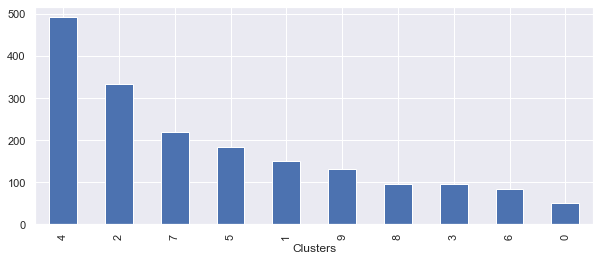

In [457]:
# Displays average prices by cluster
AvgPriceListingPerCluster = listings_new_cluster_groups['price'].sort_values(ascending=False).head(15)

AvgPriceListingPerCluster.plot.bar(figsize=(10,4))

<AxesSubplot:xlabel='Clusters'>

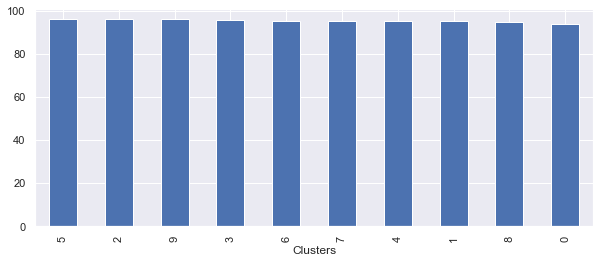

In [458]:
AvgScoreListingPerCluster = listings_new_cluster_groups['review_scores_rating'].sort_values(ascending=False).head(15)

AvgScoreListingPerCluster.plot.bar(figsize=(10,4))

In [151]:
# Creates a subset of the dataframe only holding categorical columns
cat_list = df_list.select_dtypes(include=['object'])

# Prints how many categorical columns are in the dataframe
cat_list.shape[1]

6

In [152]:
# % of rows with null values = 0
np.sum(np.sum(cat_list.isnull())/cat_list.shape[0] == 0)

4

In [153]:
# Function for creating dummy variables
cat_cols_list = cat_list.columns

def create_dummy_listing(df_list, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df_list = pd.concat([df_list.drop(col, axis=1), pd.get_dummies(df_list[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df_list  

**Most common Amenities in Toronto Airbnbs**

In [77]:
#I first create an empty list to fill with amenities available.
list_of_amenities = []

#I create a for loop to append all amenities values from the dataset into the list.
for i in range(len(df_list)):
    list_of_amenities.append(df_list['amenities'][i])

    
#In the dataset, every listing has a list of amenities, so in order to take unique amenities from the whole dataset
#I use the below code. I use the "set" function to make the amenities unique and than convert the set into a list
#to remain consistency of data type.
list_of_amenities = list((s.strip('\'\{\}') for s in list_of_amenities))
list_of_amenities_string = ",".join(list_of_amenities)
list_of_amenities = list(set(list_of_amenities_string.split(",")))

#After execution the above lines in this cell, we have an empty string in the list of amenties.
#We have to remove that one from the list.
without_empty_list_of_amenities = []
for string in list_of_amenities:
    if (string != ""):
        without_empty_list_of_amenities.append(string)
list_of_amenities = without_empty_list_of_amenities

KeyError: 82

In [532]:
def total_count(df_list, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df_list.shape[0]):
            #if the amenity is in the row add 1
            if val in df_list[col1][idx]:
                new_df[val] += int(df_list[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

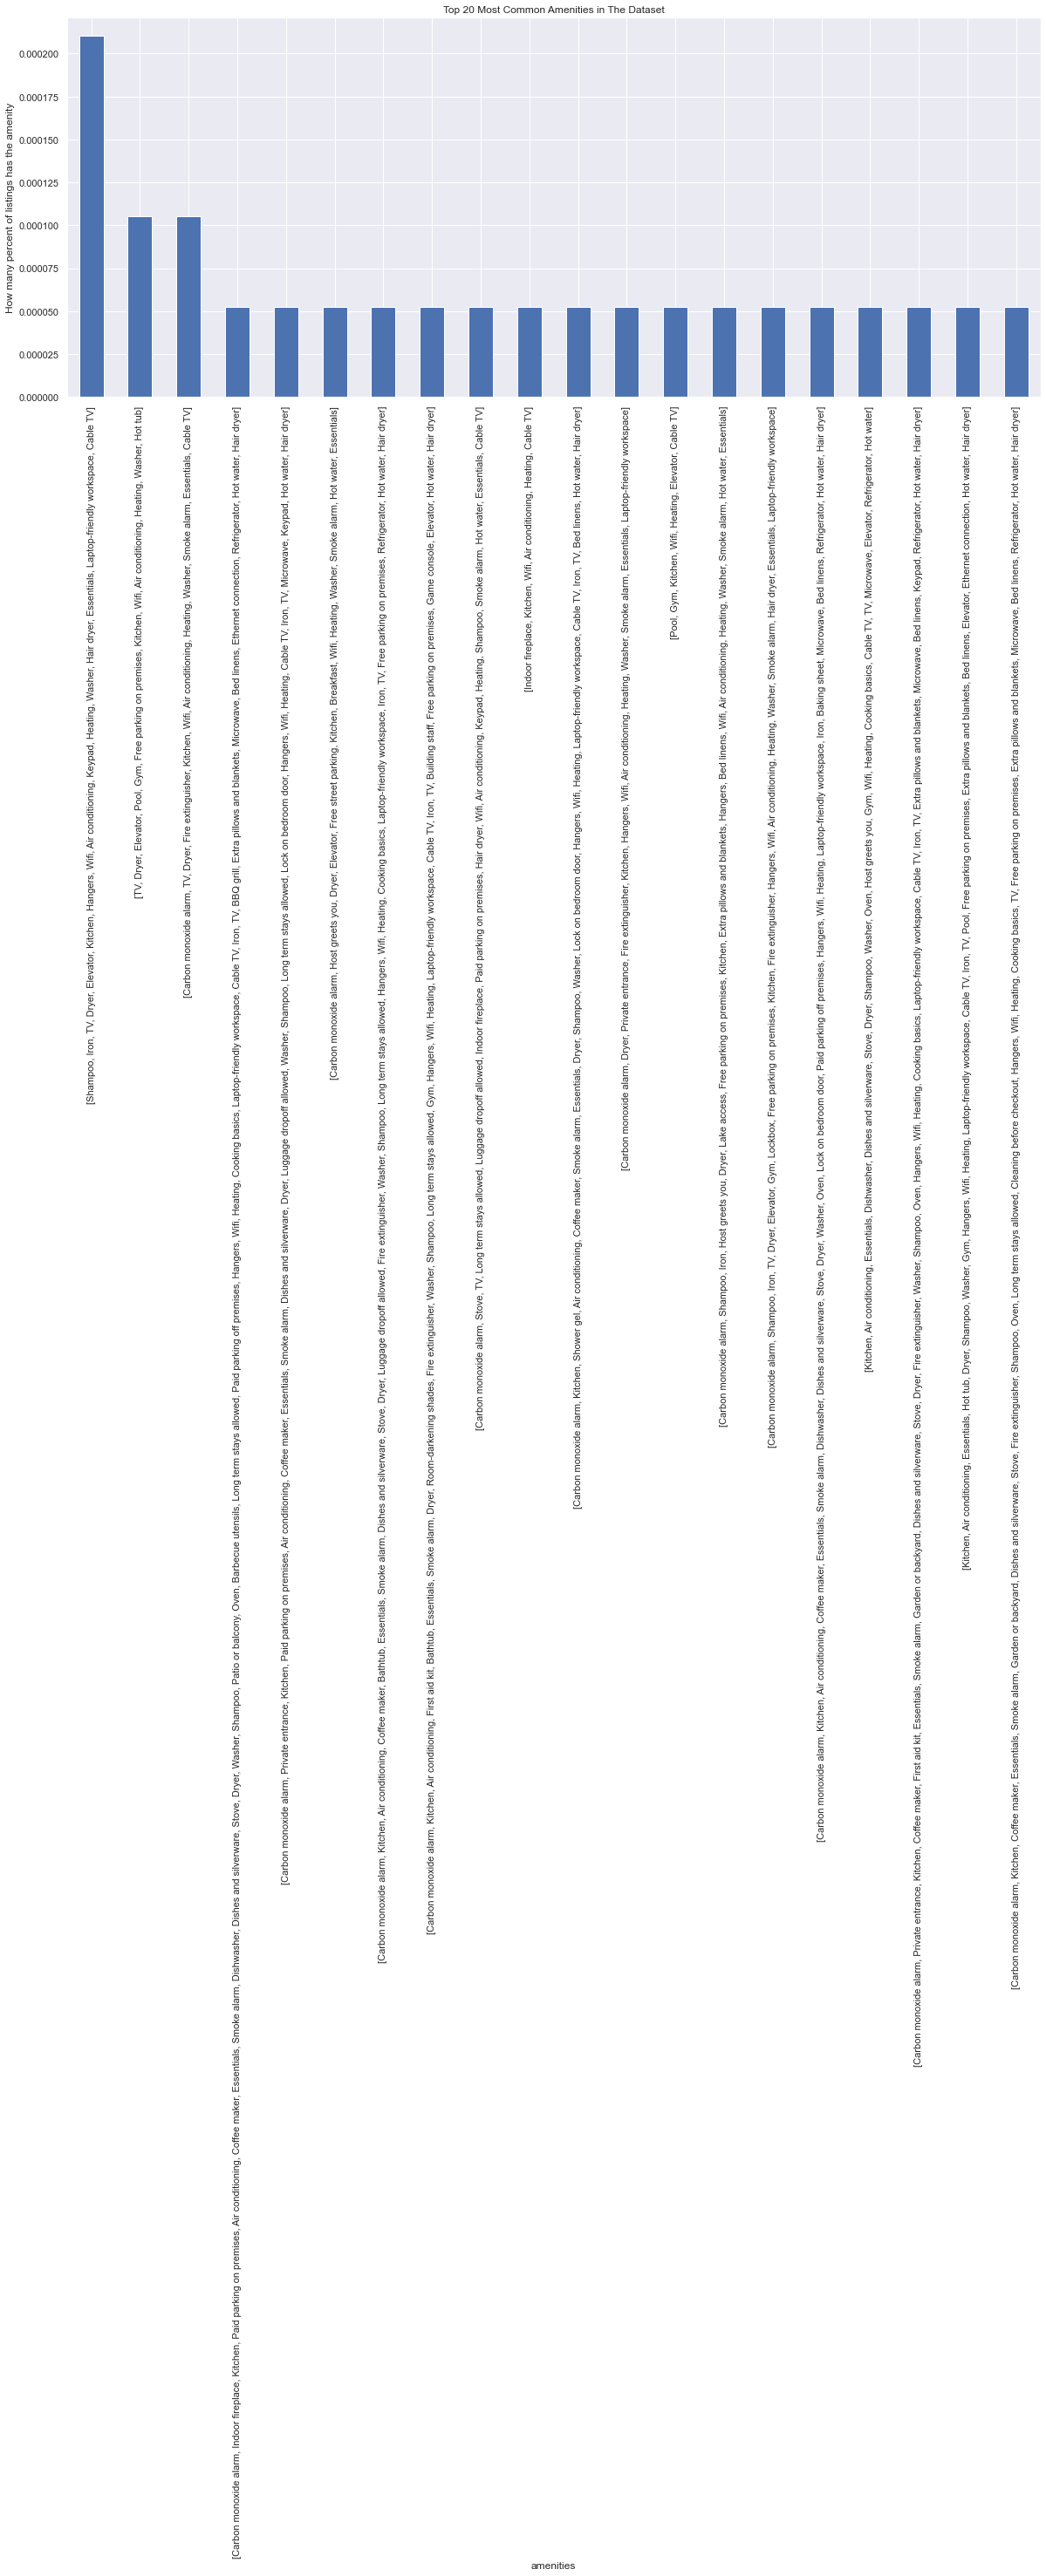

In [533]:
#I create a dataframe named study, which has lists of amenities as one column and the count of these amenities lists
#in our main (df_lis)
study = df_list['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

#Here with the total_count function, I count the number of listings that contains each amenity in the amenities list.
study_df = total_count(study, 'amenities', 'count', list_of_amenities)
study_df.set_index('amenities', inplace=True)

#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
(study_df/len(df_list))[:20].plot(kind='bar', legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('How many percent of listings has the amenity')
plt.show()